<a href="https://colab.research.google.com/github/MiguelAngel-ht/Image_Processing_/blob/main/Work_10__Filtering_Frequency_Domain__/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# **Functions**

In [2]:
def GeneraNotchIdeal( Im, D0, u0, v0 ):

  HP = GeneraHPIdeal(Im, D0)
  HP = np.fft.ifftshift(HP)

  H_NotchIdeal1 = np.roll(HP, (u0,v0), axis=(0, 1))
  H_NotchIdeal2 = np.roll(HP, (-u0,-v0), axis=(0, 1))
  H_NotchIdeal = H_NotchIdeal1 * H_NotchIdeal2
  H_NotchIdeal = np.fft.ifftshift(H_NotchIdeal)

  return H_NotchIdeal

In [3]:
def GeneraHPIdeal( Im, D0 ):
  H_HP = 1 - GeneraLPIdeal(Im, D0)
  return H_HP

In [4]:
def D_matrix(Im):

  M, N = np.shape(Im)

  if np.mod(M,2) == 0: 
      r = np.arange(-int(M/2), int(M/2), 1)  # int round to minimum
  else:
      r = np.arange(-int(M/2), int(M/2)+1, 1)
  
  if np.mod(N,2) == 0:
      c = np.arange(-int(N/2), int(N/2), 1)
  else:
      c = np.arange(-int(N/2), int(N/2)+1, 1)

  C, R = np.meshgrid(c,r)
  D = np.sqrt(R**2 + C**2)
  return D

In [5]:
def GeneraLPIdeal( Im,D0 ):

  D = D_matrix(Im)
  H_LP = (D < D0)*1.0
  H_LP = np.fft.ifftshift(H_LP)

  return H_LP

In [6]:
def GeneraLPButterworth( Im, D0, n):

  D = D_matrix(Im)
  H_LP_B = 1 / (1 + (D/D0)**(2*n))
  H_LP_B = np.fft.ifftshift(H_LP_B)

  return H_LP_B

In [7]:
def GeneraHPButterworth( Im, D0, n):

  D = D_matrix(Im)
  H_HP_B = 1 / (1 + (D0/D)**(2*n))
  H_HP_B = np.fft.ifftshift(H_HP_B)

  return H_HP_B

In [8]:
def GeneraHPGaussiano( Im, D0):

  D = D_matrix(Im)**2
  H_HP_G = 1 - np.exp(-(D**2) / (2*D0**2))
  H_HP_G = np.fft.ifftshift(H_HP_G)

  return H_HP_G

In [9]:
def GeneraLPGaussiano( Im, D0):

  D = D_matrix(Im)**2
  H_LP_G = np.exp(-D / (2*D0**2))
  H_LP_G = np.fft.ifftshift(H_LP_G)
  
  return H_LP_G

In [10]:
def AplicaFiltroFrec( Im, H ):

  Mi, Ni = np.shape(Im)
  Mh, Nh = np.shape(H)

  if Mi == Mh and Ni == Nh:
      FIm = np.fft.fft2(Im)
      FImF = FIm * H
      ImF = np.fft.ifft2(FImF)
      return ImF
  else:
      print('El filtro no tiene la dimension apropiada para la imagen')

In [11]:
def save_image(img, name):
  cv.imwrite("/content/Results/"+name+".png", img)

# **Exercises**

## **Show if function works**

In [12]:
N = 128; M = 256 

u = 5; v = 10
r = np.arange(0, N-1, 1)
c = np.arange(0, M-1, 1)
C, R = np.meshgrid(c,r)

ImFranjas = np.cos(2*np.pi*(R/N)*u + 2*np.pi*(C/M)*v)
save_image(ImFranjas*255, "Franjas_Original")

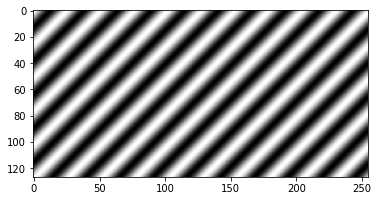

In [13]:
plt.imshow(ImFranjas, 'gray')
plt.show()

In [14]:
D0 = 2
H_NotchIdeal = GeneraNotchIdeal(ImFranjas, D0, u, v)
save_image(abs(H_NotchIdeal)*255, "Franjas_Notch")

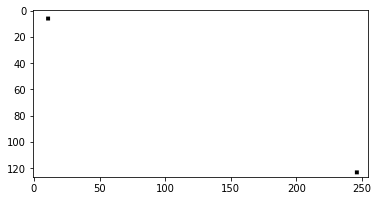

In [15]:
plt.imshow(abs(H_NotchIdeal), 'gray')
plt.show()

In [16]:
ImNotchFFT = np.fft.fft2(ImFranjas)
Prueba_Notch = AplicaFiltroFrec(ImFranjas , H_NotchIdeal)
save_image(abs(H_NotchIdeal)*255, "Ideal_Notch")
save_image(abs(Prueba_Notch)*255, "Franjas_Filtrado")

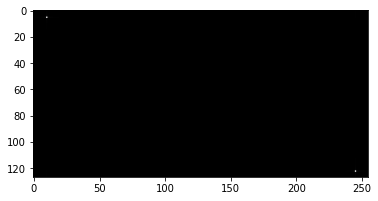

In [17]:
plt.imshow(abs(ImNotchFFT), 'gray')
plt.show()

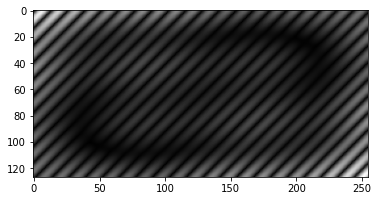

In [18]:
plt.imshow(abs(Prueba_Notch), 'gray')
plt.show()

## **Low_pass y High-pass filter**

In [19]:
img = cv.imread('/content/mama.tif', 0)

In [20]:
D0_LP = 50
n_LP = 3
H_LP_I = GeneraLPIdeal(img, D0_LP)
H_LP_G = GeneraLPGaussiano(img, D0_LP)
H_LP_B = GeneraLPButterworth(img, D0_LP, n_LP)

In [21]:
Im1_Baja_I = AplicaFiltroFrec(img, H_LP_I)
Im1_Baja_G = AplicaFiltroFrec(img, H_LP_G)
Im1_Baja_B = AplicaFiltroFrec(img, H_LP_B)

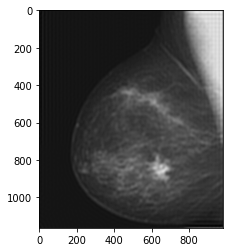

In [22]:
plt.imshow(Im1_Baja_I.real, 'gray')
plt.show()

In [23]:
D0_HP = 50
n_HP = 5
H_HP_I = GeneraHPIdeal(img, D0_HP)
H_HP_G = GeneraHPGaussiano(img, D0_HP)
H_HP_B = GeneraHPButterworth(img, D0_HP, n_HP)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [24]:
Im1_Alta_I = AplicaFiltroFrec(img, H_HP_I)
Im1_Alta_G = AplicaFiltroFrec(img, H_HP_G)
Im1_Alta_B = AplicaFiltroFrec(img, H_HP_B)

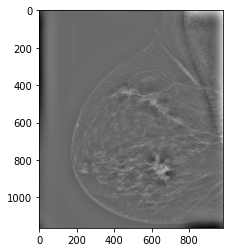

In [25]:
plt.imshow(Im1_Alta_G.real, 'gray')
plt.show()

In [88]:
save_image(Im1_Alta_G.real*1.6+150, "Altas_Gaussiano")
save_image(Im1_Alta_B.real*1.75+150, "Altas_Butterworth")
save_image(Im1_Alta_I.real*1.7+150, "Altas_Ideal")

save_image(Im1_Baja_G.real, "Bajas_Gaussiano")
save_image(Im1_Baja_B.real, "Bajas_Butterworth")
save_image(Im1_Baja_I.real, "Bajas_Ideal")

In [86]:
1.6*Im1_Alta_G.real.max()

245.18333278421179

## **Reduce Noise of Image**

In [46]:
# READ NOISED IMAGES
img2 = cv.imread('/content/RadiografiaRuidoCoherente.jpg', 0)
img3 = cv.imread('/content/FigP0405(HeadCT_corrupted).tif', 0) 

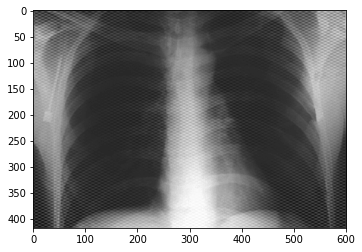

In [47]:
plt.imshow(img2, 'gray')
plt.show()

In [48]:
# Spectral of img2
Im2_FFT = np.fft.fft2(img2)
Im2_Espectro = np.log(1 + abs(Im2_FFT))

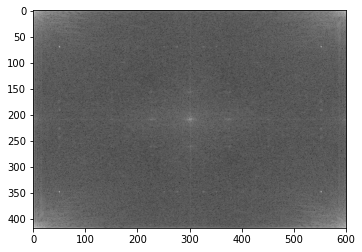

In [49]:
plt.imshow(Im2_Espectro.real, 'gray')
plt.show()

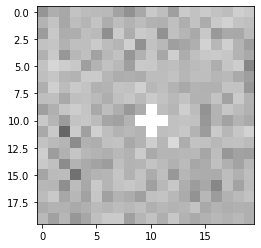

In [50]:
# points for filter
plt.imshow(Im2_Espectro.real[60:80,40:60], 'gray', vmin=0, vmax=10)
plt.show()

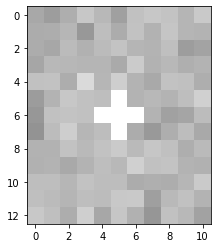

In [101]:
plt.imshow(Im2_Espectro.real[342:355,547:558], 'gray', vmin=0, vmax=10)
plt.show()

In [52]:
(345+360)/2 #545:560  #348.5 y 352,5

352.5

In [53]:
H2_Notch_1 = GeneraNotchIdeal(img2, 2.5, 70, 50)
H2_Notch_2 = GeneraNotchIdeal(img2, 2.5, 70, 552)
H2_Notch = H2_Notch_1 * H2_Notch_2

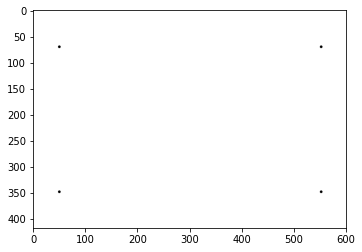

In [54]:
plt.imshow(H2_Notch, 'gray')
plt.show()

In [55]:
# Notch Filter in img2
Im2_Filt = AplicaFiltroFrec(img2, H2_Notch)

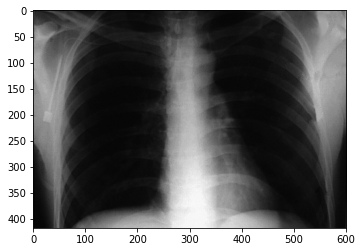

In [56]:
plt.imshow(Im2_Filt.real, 'gray')
plt.show()

In [97]:
# SAVING IMAGES AND SCALING SOME OF THEM 
save_image(img2, "Pecho_Original")
save_image(15*Im2_Espectro.real, "Pecho_Espectro")
save_image(H2_Notch*255, "Pecho_Notch")
save_image(Im2_Filt.real, "Pecho_Filtro")

In [58]:
# Spectral of img3
Im3_FFT = np.fft.fft2(img3);
Im3_Espectro = np.log(1 + abs(Im3_FFT));
Im3_Espectro_Shift = np.fft.fftshift(Im3_Espectro);

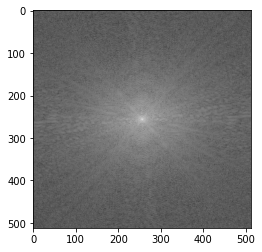

In [75]:
plt.imshow(Im3_Espectro_Shift.real, 'gray', vmin=1, vmax=17)
plt.show()

In [60]:
# Notch filters to every series of noise
H3_Notch_1 = GeneraNotchIdeal(img3, 1, 216, 216)
H3_Notch_2 = GeneraNotchIdeal(img3, 1, 236, 256)
H3_Notch_3 = GeneraNotchIdeal(img3, 1, 256, 246)
H3_Notch_Shift = H3_Notch_1 *H3_Notch_2 *H3_Notch_3

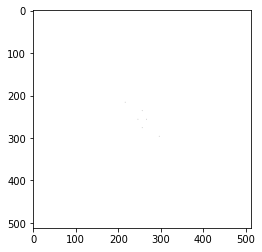

In [61]:
plt.imshow(H3_Notch_Shift, 'gray')
plt.show()

In [62]:
# Notch filter in img3
H3_Notch = np.fft.ifftshift(H3_Notch_Shift)
Im3_Filt = AplicaFiltroFrec(img3, H3_Notch)

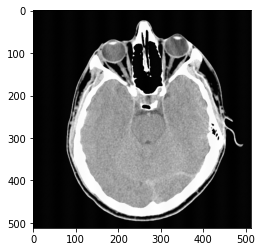

In [63]:
plt.imshow(Im3_Filt.real, 'gray')
plt.show()

In [78]:
# SAVING RESULTS AND SCALING SOME OF THEM
save_image(img3, "Radio_Original")
save_image(Im3_Espectro_Shift.real*14, "Radio_Espectro")
save_image(H3_Notch_Shift*255, "Radio_Notch")
save_image(Im3_Filt.real, "Radio_Filtro")